### Group members (first and last names):
- ####  *Abdelhak Kermia*


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_theme(rc={'figure.figsize':(8, 6)}, style='whitegrid')

# Introduction to Unsupervised Learning
Unsupervised learning is a branch of machine learning that deals with finding patterns and structures in unlabeled data. Unlike supervised learning, where the algorithm learns from labeled examples, unsupervised learning algorithms must discover patterns on their own.

This assignment covers:

- Clustering algorithms ($k$-means, DBSCAN)
- Methods for determining optimal cluster numbers
- Dimensionality reduction with PCA
- Practical applications of $k$-means and PCA

This assignment involves extensive plotting. The easiest option for creating plots is `seaborn` because it integrates seamlessly with `pandas`. However, if you're up for a challenge and more control over your visualizations, I highly recommend getting familiar with `matplotlib`. While it has a steeper learning curve, it offers a broader range of customization options to fine-tune your plots.

For help with `matplotlib`, click [here](https://matplotlib.org/stable/tutorials/pyplot.html) 📈


---
## How to pass the assignment?
Below, you will find the exercise questions. Each question that awards points is numbered and displays the available points in this format: **(0 pts)**.

### Answering Questions
- Provide your answers in the cell directly below each question.
- Use **Markdown** for text-based answers (in **English**).
- Use **code cells** for implementations.
- **Incomplete or incorrect answers receive 0 points.** Partial credit may be awarded at the teacher's discretion.
- Overly detailed answers do not grant extra points. Stick to what is asked.

### Critical Thinking Questions and Bonus Exercises
- Some questions are marked with a 🧠 (Critical Thinking) or a ⭐ (Bonus Exercise). These are for self-reflection and extra practice.
- They are **optional** and do **not** award any points.
- Answering them can help reinforce your understanding.

### Important Notes
- Save your work frequently! `(Ctrl + S)`
- Before submitting, `Restart Session and Run All` cells to ensure everything works correctly.
- **You need at least 23 points out of 34 (66%) to pass ✅**
---

In [2]:
points=34

# 1. Fundamentals

#### 1.1 **(1pt) Write an example of a Machine Learning application for which the Unsupervised Learning paradigm is an ideal choice.**

UL shines in scenarios where there is a lot of data but labelled outputs are lacking. A good application for unsupervised learning is e.g. customer segmentation in e-commerce<Br>
   - e.g. large e-commerces companies possess a big amount of data on customers purchases history, browsing behavior, demographics.
     - but they don't have preexisting labels to define customers groups

UL can help to analyse this customers data by automatically grouping customers (making categories) by similar behaviors: (explore and analyse underlying structure of customer data)
 - e.g.  occasional browsers, savy shoppers, luxury buyers.

And use this segmentation to make personalized marketing campaigns, optimize product recommendations or improve customer experience,...


#### 1.2 **(1pt) What is the key difference between Supervised and Unsupervised Learning in terms of data and objectives? Explain in your own words.**

Supervised
 - **Data:** use labeled data as targets, each training data has a correct response associated with it.
 - **Objectives:** classify, predict // learning a mapping function that can predict/classify the correct output(labels) using some features as input.

Unsupervised
 - **Data:** use unlabeled data, so each training data does not have a correct response associated with it.
 - **Objectives:** do data exploration, discover hidden patterns, underlying structure, relationships, find clusters and/or reduce dimensionality.

#### 1.3 **(1pt) Why is evaluating the performance of an Unsupervised Learning model more challenging than for a Supervised Learning model? Provide an example.**

In UL there is no targets/labels/ground truth to directly verify/evaluate the quality/performance (accuracy or other metrics) of our models. The quality is then more subjective in UL and depends mainly on the applications. It often relies on indirect metrics like clustering coherence or separation and human interpretation/interaction.

If we reprise the case of customer segmentation in e-commerce:<br>
How do we know if the groups/clusters are meaningfully / correct ?
   - Since, we don't have predefined groups/labels to validate/test our groups/clusters against in our data.
      - Internal validation: e.g. silhouette score could be used to get an idea of how similar objects are to their own clusters compared to the others. ("similarity" score)
      - External validation: e.g. if we have some labels/external data that can be used to compare our results/models to.
        - e.g. Historical data, open source data, business data, ... (not always / not usually the case)

In short the challenge is that there is no "right" answer: more nuanced and often subjective evaluation are required :
- in our case of customer segmentation: business or domain expertise (human interpretation and decision) would be key to determine the right parameters, inputs, meanings, usefulness of the groups/segments.



---
# 2. Clustering


## K-Means Clustering

#### 2.1 **(3 pts) Explain how the $k$-means algorithm works. What is the goal of the algorithm? Which parameters does the user need to define?**

🤷 Need some help? Check out this [video](https://www.youtube.com/watch?v=4b5d3muPQmA).

How it works ?<br>
The K-Means algorithm partitions a dataset into k clusters by assigning each data point to the cluster whose centroid is closest in terms of distance <br>
The steps of k-mean algorithm:
- Initialisation: randomly place a defined numbers k of centroids (cluster center) in the data space (not too far away // slower convergence)
- Assignment: datapoints are assigns to the nearest centroids using a distance metric (usually Euclidian but can be Manhattan or other)
- Update: centroids are recalculated using the mean of all datapoints assign to each of the clusters.
- Iteration: repeat the steps of assignments and update until a threshold of variation of position of the centroids is reached or a number of iteration is reached.
- Convergence: is reached when datapoints assignments to clusters stop changing or a threshold in change is reached.

What is the goal ?
- aims to find the clusters/groups that minimize the dissimilarity of datapoint inside theirs own clusters and maximize it for datapoints outside using the means and euclidian distance (usually)
  - shorter: it aims at minimizing the within-cluster variance.

Which (hyper)parameters user need to define ? <br>
Here is some of the parameters we can choose from:
- k number of clusters: how many clusters do we want/should we choose ? (the most important)
- the initialisation method : where the centroids are placed/ how their initial position are chosen (k-mean is sensitive to the initial position of the centroid)
- the number of initialisation : number of iteration with different initial centroid position
- the tolerance (tol): min value/threshold for iteration cycles to stop -> convergence deemed to be reached // centroid changes are small enough.



---
Let's see how this works on the `penguins` dataset. Since we have labels, we can check accuracy—but in real UL applications, this isn't usually possible 😉

K-Means assigns random numbers to clusters, so we don’t know which cluster corresponds to which species. To fix this, we test all possible mappings and pick the one that minimizes misclassifications. This lets us evaluate how well K-Means grouped the data.


In [3]:
# Goal: convert the labels to the cluster numbers generated by k-means
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and pre-process Penguins dataset with pandas
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True) # drop NA
X = penguins.drop(['species', 'island', 'sex'], axis=1) # remove categorical variables
y = penguins['species'].astype('category').cat.codes # encode labels to integers
labels = penguins['species'].unique() # keep the string labels in a numpy array

species_names = y.unique()

X_scaled = StandardScaler().fit_transform(X) # we need to scale the inputs
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Generate all possible permutations of cluster labels
possible_codes = itertools.permutations(range(len(species_names)))
converters = [dict(zip(species_names, perm)) for perm in possible_codes]
# print(converters) # try printing each of these variables and understand what they do

def cluster_to_class(model, fn_that_counts_misclassified, x_test, y_test):
    min_score = np.inf
    right_conversion = None
    for converter in converters:
        conv_y_test = y_test.map(converter)
        misclassified = fn_that_counts_misclassified(model, x_test, conv_y_test)
        if misclassified < min_score:
            min_score = misclassified
            right_conversion = converter
    return right_conversion

# Scoring function based on labels
def mis_score_fn(model, X_test, y_test):
    y_hat = model.predict(X_test)
    return np.sum(y_test != y_hat)

# K-Means clustering (fit requires a 2D matrix)
kmeans = KMeans(random_state=42, n_init="auto").fit(X_train)

# Use the cluster_to_class function
right_conversion = cluster_to_class(kmeans, mis_score_fn, X_test, y_test)
conv_y_test = y_test.map(right_conversion)
k_means_misclassified = mis_score_fn(kmeans, X_test, conv_y_test)

# Print results
print('Right Conversion:', right_conversion)
print('Misclassified:', k_means_misclassified)
print('Accuracy:', round((len(y_test) - k_means_misclassified) / len(y_test) * 100, 2), '%')


Right Conversion: {0: 2, 1: 1, 2: 0}
Misclassified: 39
Accuracy: 41.79 %


c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


That doesn't perform very well... do you know why?
- Too many clusters

#### 2.2 **(1pt) Retrain the K-Means model in the cell below with different parameters to improve the accuracy.**


In [4]:
# Varying numbers of clusters (k : n_clusters) to find the best accuracy.
n_clusters_choice = [1, 2, 3, 4, 5] #8 is the default KMEANS // https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
best_numbers_clusters = None
best_accuracy = None
min_misclassified = np.inf

print("Varying numbers of clusters (k) :\n")
for n_clusters in n_clusters_choice:

    # Clustering/Retraining with varying cluster number.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(X_train)

    # Use the cluster_to_class function to get the right conversion
    right_conversion = cluster_to_class(kmeans, mis_score_fn, X_test, y_test)
    conv_y_test = y_test.map(right_conversion) # Mapping for classes (0,1,2 // adelie,chinstrap,gentoo)

    # Calculate/print the number of misclassified samples and accuracy, k number.
    misclassified = mis_score_fn(kmeans, X_test, conv_y_test) # Number of missclassifications
    print(f"Number of clusters(k): {n_clusters} \n- Misclassified (FP): {misclassified} \n- Accuracy: {(len(y_test) - misclassified)*100 / len(y_test):.2f} %") # Show the performance by cluster number

    # Find and keep the best number of cluster and the related metrics
    if misclassified < min_misclassified:
        min_misclassified = misclassified
        best_numbers_clusters = n_clusters
        best_accuracy = (len(y_test) - misclassified)*100 / len(y_test)
    print('- Right Conversion:', right_conversion, "\n")

print(f"The best number of cluster is {best_numbers_clusters} and the accuracy is {best_accuracy:.2f}% with {min_misclassified} misclassifications.")
print("The best number of cluster match the exact number of species we have in the dataset")

# Alternative: more parameters changes other than k -> give the same end result and same accuracy.

kmeans_improved = KMeans(
    n_clusters=len(species_names),  # Model is set to the number of species here = 3
    init='k-means++', # Strategic picking of initial centroids using sampling based on an empirical probability distribution of the points contribution to the overall inertia: speeds up convergence.
    n_init=20,  # Improve the model's stability (20 times with different centroid seeds)
    max_iter=500,   # More iterations for the model for convergence (if needed default is 300)
    random_state=42
    ).fit(X_train)

right_conversion_improved = cluster_to_class(kmeans_improved, mis_score_fn, X_test, y_test)
conv_y_test_improved = y_test.map(right_conversion_improved)
k_means_misclassified_improved = mis_score_fn(kmeans_improved, X_test, conv_y_test_improved)

print('\nChange more parameters, other than k')
print('- Misclassified:', k_means_misclassified_improved,
      '\n- Accuracy:', round((len(y_test) - k_means_misclassified_improved) / len(y_test) * 100, 2,), '%',
      '\n- Right Conversion:', right_conversion_improved)

Varying numbers of clusters (k) :

Number of clusters(k): 1 
- Misclassified (FP): 36 
- Accuracy: 46.27 %
- Right Conversion: {0: 0, 1: 1, 2: 2} 

Number of clusters(k): 2 
- Misclassified (FP): 13 
- Accuracy: 80.60 %
- Right Conversion: {0: 1, 1: 2, 2: 0} 

Number of clusters(k): 3 
- Misclassified (FP): 5 
- Accuracy: 92.54 %
- Right Conversion: {0: 2, 1: 1, 2: 0} 

Number of clusters(k): 4 
- Misclassified (FP): 12 
- Accuracy: 82.09 %
- Right Conversion: {0: 2, 1: 1, 2: 0} 

Number of clusters(k): 5 
- Misclassified (FP): 23 
- Accuracy: 65.67 %
- Right Conversion: {0: 2, 1: 1, 2: 0} 

The best number of cluster is 3 and the accuracy is 92.54% with 5 misclassifications.
The best number of cluster match the exact number of species we have in the dataset

Change more parameters, other than k
- Misclassified: 5 
- Accuracy: 92.54 % 
- Right Conversion: {0: 2, 1: 1, 2: 0}


c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

#### 2.3 **(3pt) Plot the centroids of both $k$-means models over the `penguins` dataset (side-by-side).**

To get the centroid coordinates, use the `cluster_centers_` attribute of the KMeans object.

A more structured approach is to convert the centroids into a DataFrame:
```
columns = penguins.columns.drop('species')  # Remove species since centroids don’t have labels
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
```
For visibility, you can pass styling options like this:

```
kwargs = {'marker': 'X', 'color': 'r', 's': 200, 'label': 'Centroids'}
```
and use `**kwargs` in scatterplot() to apply them.


The question is open-ended, so choose a meaningful plot. The simplest is `bill_length_mm` vs. `body_mass_g`.

c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')


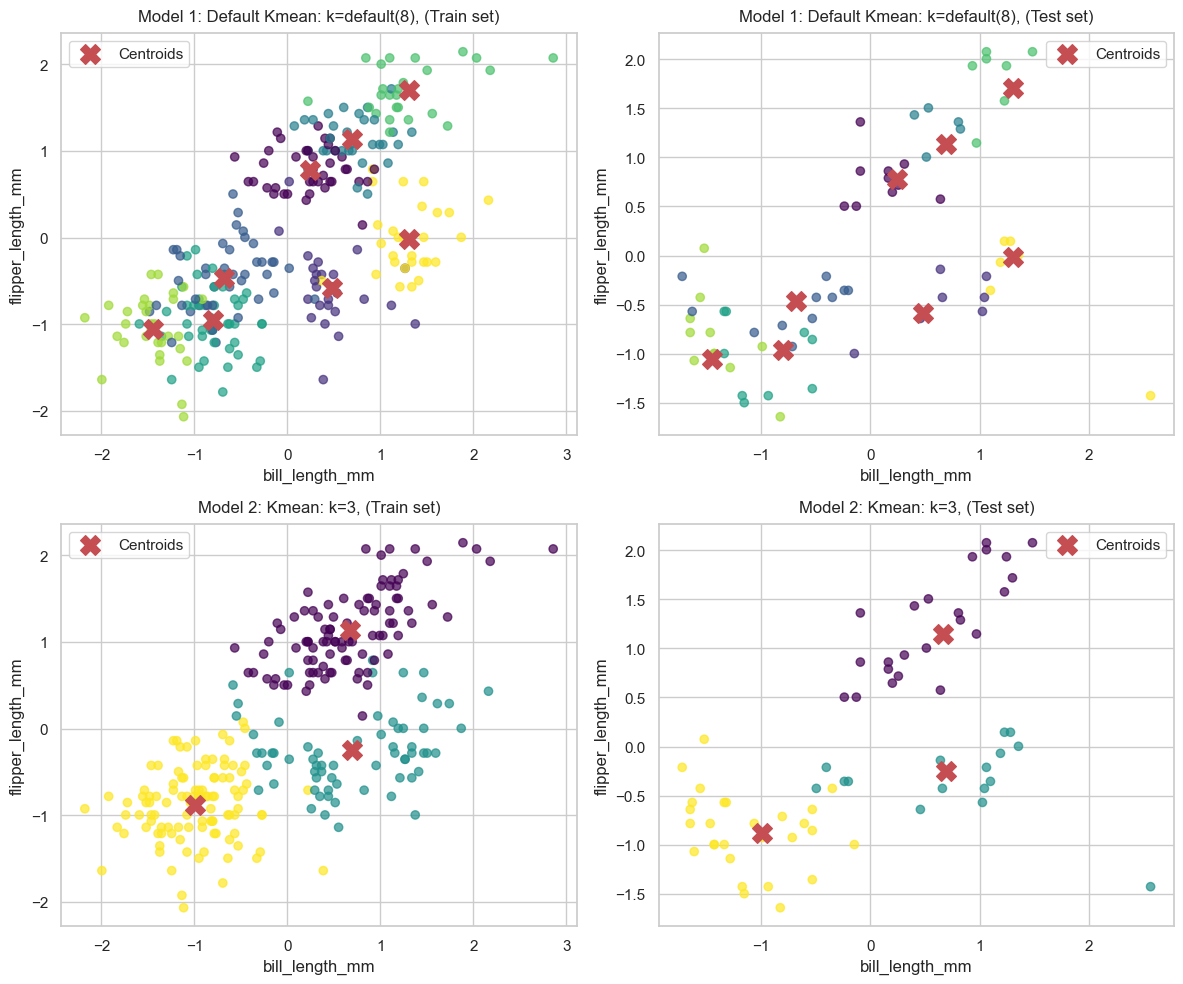

In [5]:
# 1st model (default K-mean): k=default(8)
kmeans1 = KMeans(random_state=42,n_init="auto").fit(X_train)
labels1_train = kmeans1.predict(X_train) #predict train
labels1_test = kmeans1.predict(X_test) #predict test

# 2nd model (best k): k=3
kmeans2 = KMeans(n_clusters=3, random_state=42,n_init="auto").fit(X_train)
labels2_train = kmeans2.predict(X_train) #predict train
labels2_test = kmeans2.predict(X_test) #predict test

# Get centroids
feature_name_list = X.columns # already done before: dropped all categorical classes
print(feature_name_list) # features index
centroids_df1 = pd.DataFrame(kmeans1.cluster_centers_, columns=feature_name_list)
centroids_df2 = pd.DataFrame(kmeans2.cluster_centers_, columns=feature_name_list)

# Create side-by-side plots (2 row, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #2 by 2 for train and test sets of both models

# Define keyword arguments for centroids
kwargs = {'marker': 'X', 'color': 'r', 's': 200, 'label': 'Centroids'} # Red x marker

# Define a function to plot clusters on top of data with matplotlib // https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter
def plot_clusters(ax, X, labels, centroids, title, feature_name_list, feature1_name, feature2_name):

    feature1_idx = feature_name_list.get_loc(feature1_name) # index of features
    feature2_idx = feature_name_list.get_loc(feature2_name)

    ax.scatter(X[:,feature1_idx],
               X[:,feature2_idx],
               c=labels, cmap='viridis', alpha=0.7)
    ax.scatter(centroids[:,feature1_idx], centroids[:,feature2_idx], **kwargs) # centroids
    ax.set_title(title,y=1.01)
    ax.set_xlabel(feature1_name)
    ax.set_ylabel(feature2_name)
    ax.legend()

# Plot first model
# Feature choice
feature1 = feature_name_list[0]; feature2 = feature_name_list[2] # features index: 0 'bill_length_mm', 1 'bill_depth_mm', 2 'flipper_length_mm', 3 'body_mass_g'

plot_clusters(axes[0,1], X_test.values, labels1_test, centroids_df1.values, 'Model 1: Default Kmean: k=default(8), (Test set)',feature_name_list, feature1, feature2) # Plot test
plot_clusters(axes[0,0], X_train.values, labels1_train, centroids_df1.values, 'Model 1: Default Kmean: k=default(8), (Train set)',feature_name_list, feature1, feature2) # Plot train

# Plot second model
plot_clusters(axes[1,0], X_train.values, labels2_train, centroids_df2.values, 'Model 2: Kmean: k=3, (Train set)', feature_name_list, feature1, feature2)
plot_clusters(axes[1,1], X_test.values, labels2_test, centroids_df2.values, 'Model 2: Kmean: k=3, (Test set)', feature_name_list, feature1, feature2)

plt.subplots_adjust(hspace=0.5)  # Vertical spacing
plt.tight_layout()
plt.show()


#### 🧠 Critical Thinking

- What would happen if we ran the K-means algorithm multiple times with a different `random state`?
- We trained the $k$-means model using all four continuous features of the penguins dataset, but we only plotted the centroids for two of them. Is this a valid approach? Why or why not?

#### ⭐ Bonus: Create a visualization that explores all feature relationships in the penguins dataset using a `PairGrid`. Display scatterplots for off-diagonal relationships, color points by cluster, and show feature distributions on the diagonal using `kdeplot()`.

c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


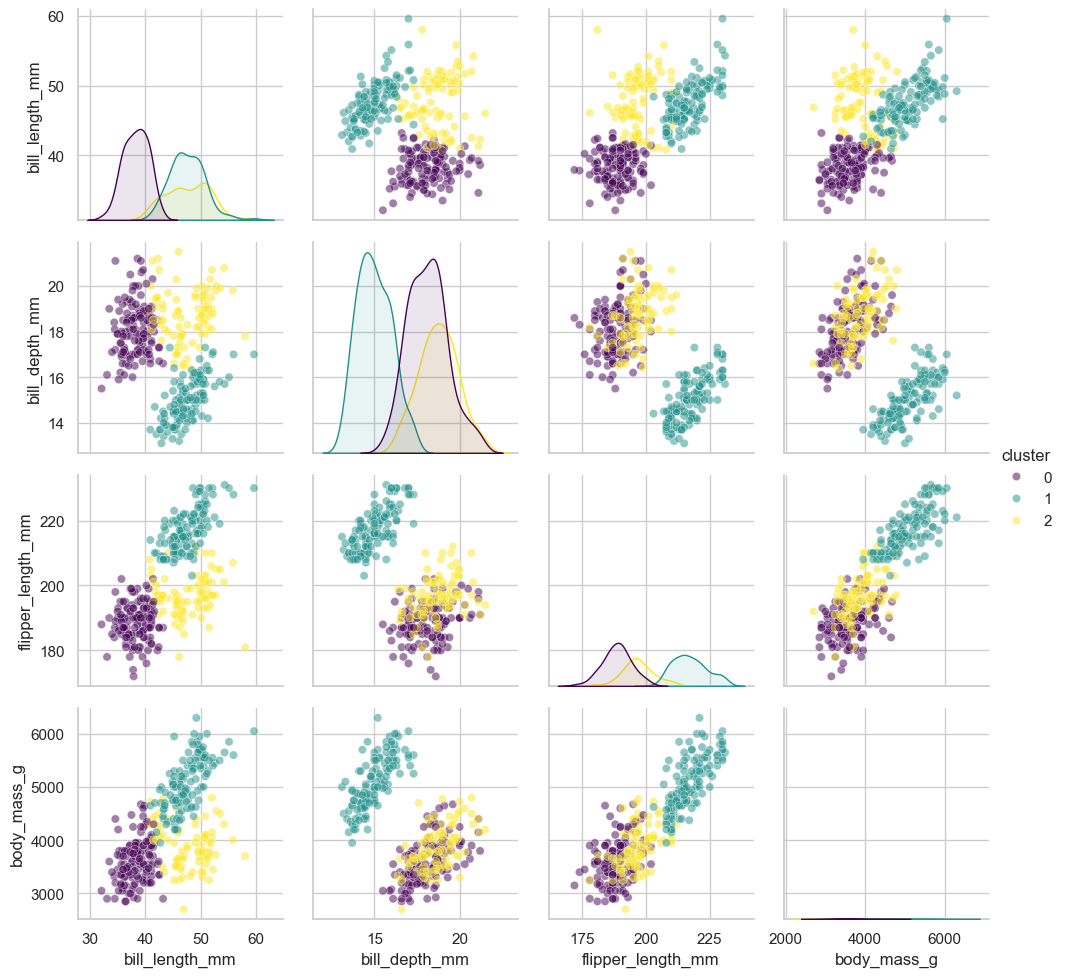

In [6]:
# Fit K-Means model (on entire dataset)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
penguins['cluster'] = kmeans.fit_predict(X_scaled_df)

# Create a PairGrid // https://seaborn.pydata.org/generated/seaborn.PairGrid.html
grid_plot = sns.PairGrid(penguins, hue='cluster', palette="viridis")

# Use kdeplot for diagonal distributions // https://seaborn.pydata.org/generated/seaborn.kdeplot.html (kernel density plot) and https://seaborn.pydata.org/generated/seaborn.PairGrid.map_diag.html#
grid_plot.map_diag(sns.kdeplot, fill = True, alpha = 0.1)

# Use scatterplot for off-diagonal relationships // https://seaborn.pydata.org/generated/seaborn.PairGrid.map_offdiag.html
grid_plot.map_offdiag(sns.scatterplot, alpha = 0.5)

# Add legend // https://seaborn.pydata.org/generated/seaborn.PairGrid.add_legend.html
grid_plot.add_legend()

plt.show()

---
## Choosing the Number of Clusters

Alright, let's work with some true unlabelled data and try out various clustering algorithms.

First, let's generate some data and then explore how we can choose the number of clusters to pass to the algorithms.

- **Elbow Method**: Plot inertia vs. $k$ and identify the "elbow" point.

- **Silhouette Score**: Measures cluster compactness and separation.


### Generate Data
Let's pretend we have ✨ *no clue* ✨ how many clusters exist.

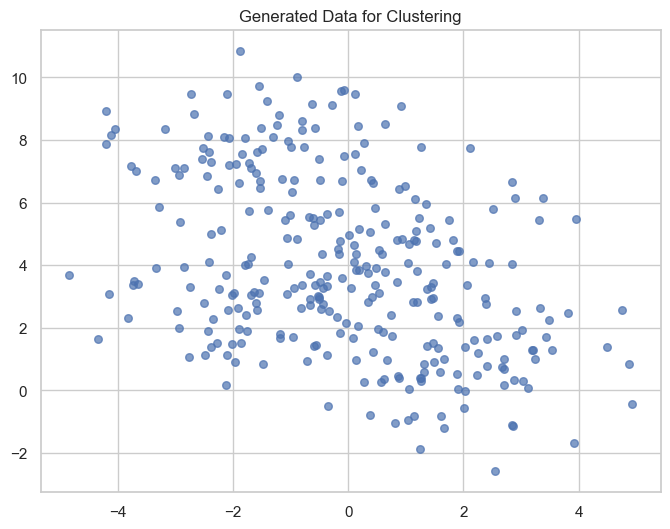

In [7]:
from sklearn.datasets import make_blobs

# Generate synthetic data (X is a 2D matrix)
n_clusters = 4
X, _ = make_blobs(n_samples=300, centers=n_clusters, cluster_std=1.25, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7)
plt.title("Generated Data for Clustering")
plt.show()


Visually, the clusters appear to merge into a single dense region, making it difficult to distinguish clear boundaries between them.

### Method 1: Using the Elbow Method
The elbow method helps to determine the optimal number of clusters by plotting the sum of squared distances (inertia) from each point to its assigned cluster center. The optimal number of clusters is typically where the "elbow" occurs, indicating a point after which adding more clusters doesn’t result in a significant reduction in inertia.

**How it works:**
1. Implement K-Means clustering for a range of cluster numbers.
2. For each number of clusters, calculate the inertia (within-cluster sum of squares).
3. Plot the inertia against the number of clusters to visualize the elbow.

**Interpretation:**
-  Visually identify where the inertia starts to decrease at a slower rate (the elbow). This is likely the optimal number of clusters.

Hint: You can use `KMeans` from `sklearn.cluster` and `inertia_` to get the sum of squared distances.

#### 2.4 **(1pt) In the elbow plot  created below, where do you think the optimal number of clusters should be? Highlight this point on the graph by filling in the missing parts of the code.**

c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

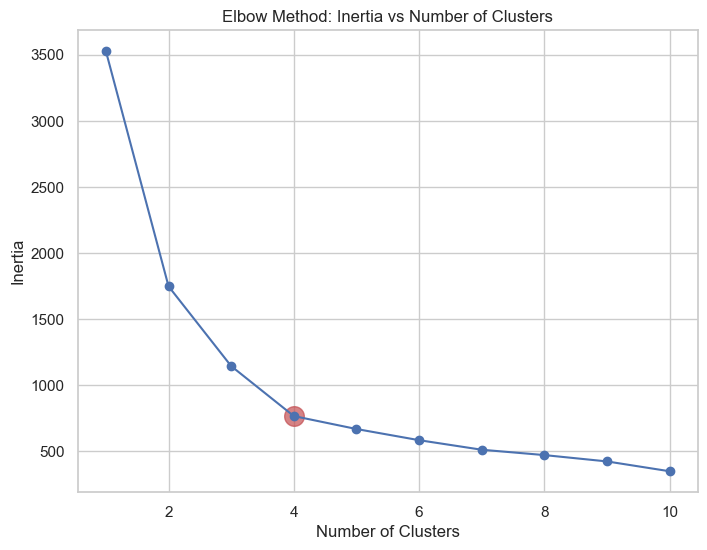

Optimal k using second differences: 4
Second difference values:
Cluster 3: 225.3
Cluster 4: 280.19
Cluster 5: 13.47
Cluster 6: 12.11
Cluster 7: 31.94
Cluster 8: -7.59
Cluster 9: -26.41


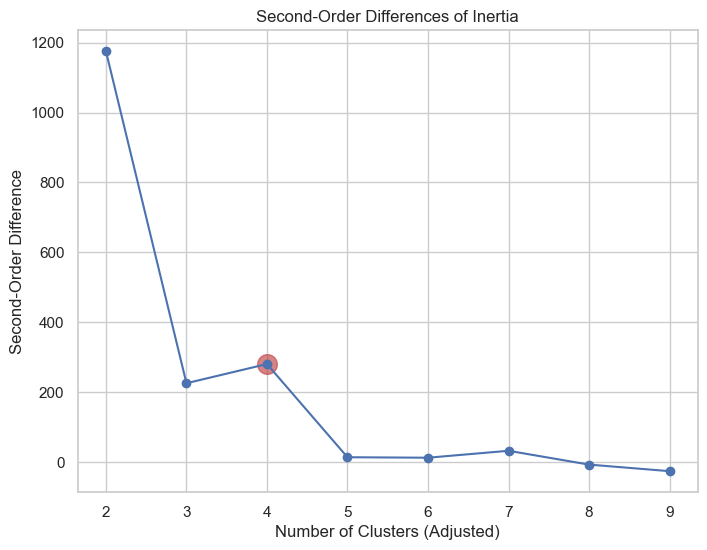

In [8]:
# Make sure you understand this code
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.scatter(x=[cluster_range[3]], # 3 + cluster range 1 = 4th index clusters
            y=inertia_values[3], # 4th index values of inertia
            s=200, color='r', alpha=0.7) # highlight the point with the correct number of clusters // By eyeballing: k=4 (here we now it's 4 since we generated the data).
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Another way:
# The second difference of inertia plot to see the drop : observe a steep drop in inertia ("non-trivial")
second_diff = np.diff(inertia_values, 2)
adjusted_second_diff = second_diff[1:] # Since the first drop is trivial between cluster 1-2 -> Omit -> Start from the second element
adjusted_cluster_range = cluster_range[1:-1] # Adjustements for plot : cluster 2-9
k_optimal = np.argmax(adjusted_second_diff) + 2 # +2 Since array index is reduced by 2 with 2nd diff

# Print second difference of inertia values and optimal k_value found with it.
print("Optimal k using second differences:", k_optimal+1) # Start at 1
print(f'Second difference values:')
for cluster_num, diff in zip(adjusted_cluster_range[1:], adjusted_second_diff):
    print(f"Cluster {cluster_num}: {round(diff, 2)}")

# Plot Second Difference of Inertia
plt.plot(adjusted_cluster_range, second_diff, marker='o')
plt.scatter(x=[cluster_range[k_optimal]],
            y=second_diff[k_optimal-1],
            s=200, color='r', alpha=0.7)
plt.title('Second-Order Differences of Inertia')
plt.xlabel('Number of Clusters (Adjusted)')
plt.ylabel('Second-Order Difference')

plt.show()

### Method 2: Using the Silhouette Score
The **silhouette score** measures how well a data point fits into its assigned cluster by comparing its average distance to points in the same cluster (**a**) versus the closest other cluster (**b**). It ranges from **-1 to 1**, where higher values mean well-separated clusters, and it is usually calculated using **Euclidean distance** to determine cohesion (tightness) and separation (distance from other clusters).

**How it works:**
1. For each number of clusters (e.g., 1 to 10), calculate the silhouette score.
2. Plot the silhouette score against the number of clusters to find the optimal number.

**Interpretation:**
- Visually identify the number of clusters that results in the highest silhouette score. This number should be considered the optimal cluster count, particularly if it coincides with the elbow method.

Hint: You can use `silhouette_score` from `sklearn.metrics` to calculate the score.

#### 2.5 **(1pt) In the silhouette score plot created below, where do you think the optimal number of clusters should be? Highlight this point on the graph by filling in the missing parts of the code.**

c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

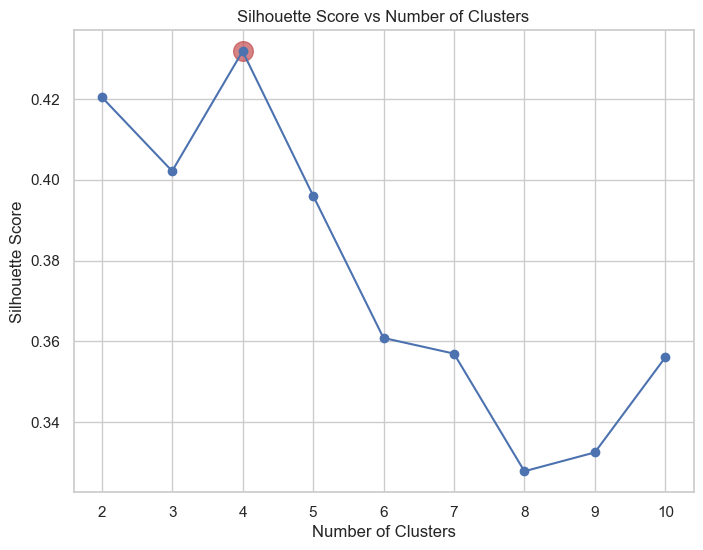

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in cluster_range[1:]:  # Skipping k=1 because silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(score)

# Plot the silhouette scores

optimal_k = silhouette_scores.index(max(silhouette_scores)) # Find the index of the max value of the silhouette score
# By eyeballing we can easily find that it's the number of clusters 4 which is the max of the silhouette score.

plt.scatter(x=[cluster_range[optimal_k+1]], # Raw index value: 3 -> 2+1 since cluster range start at 1.
            y=silhouette_scores[optimal_k], # Raw index value: 2 -> third index value = max
            s=200, color='r', alpha=0.7) # highlight the point with the correct number of clusters // the max of the silhouette
plt.plot(cluster_range[1:], silhouette_scores, marker='o') # Silhouette_scores start from second index
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


---
## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Theory**

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, marking points in low-density regions as outliers.

**Key Concepts:**
- **Core Point:** A point with at least `min_samples` points within distance `eps`
- **Border Point:** A point within distance `eps` of a core point but with fewer than `min_samples` neighbors
- **Noise Point:** A point that is neither a core point nor a border point

**Here's how it works:**
1. For each point, determine if it's a core point
2. Connect all core points that are within distance `eps` of each other
3. Form clusters from connected core points
Assign each border point to the cluster of its neighboring core point
4. Designate all remaining points as noise

🤷 Need some help? Check out this [video](https://www.youtube.com/watch?v=RDZUdRSDOok&ab_channel=StatQuestwithJoshStarmer).

#### 2.6 **(13pts) Use scikit-learn to apply DBSCAN and K-Means on the generated data below and plot the results according to the instructions below using `matplotlib`.**

**DBSCAN parameters:**
- `eps = 0.2`
- `min_samples = 5`

**K-means parameters:**
- `n_clusters = 2`
- `random_state = 42`

**Instructions:**
1. Apply DBSCAN to both datasets and plot the results in the left column of a 2x2 grid (4pts).
2. Apply K-means clustering to both datasets and plot the results in the right column of the same 2x2 grid (4pts).
3. For K-means, also plot the cluster centers as distinct markers (1pt).
4. Make sure to color-code the clusters by their labels in both DBSCAN and K-means plots, so that the different clusters are visually distinguishable (1pt).
5. Make sure to include a title for each subplot to indicate which clustering algorithm and dataset is being displayed (1pt).
6. Include the silhouette score in each subplot title by calculating it for both DBSCAN and K-means using Euclidean distance. Round the score to 2 decimal points (2pts).

In [10]:
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN

# Generate datasets
n_samples = 300

# Dataset 1: Concentric circles
X_circles, _ = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=42)

# Dataset 2: Moon-shaped clusters
X_moons, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=42)


c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


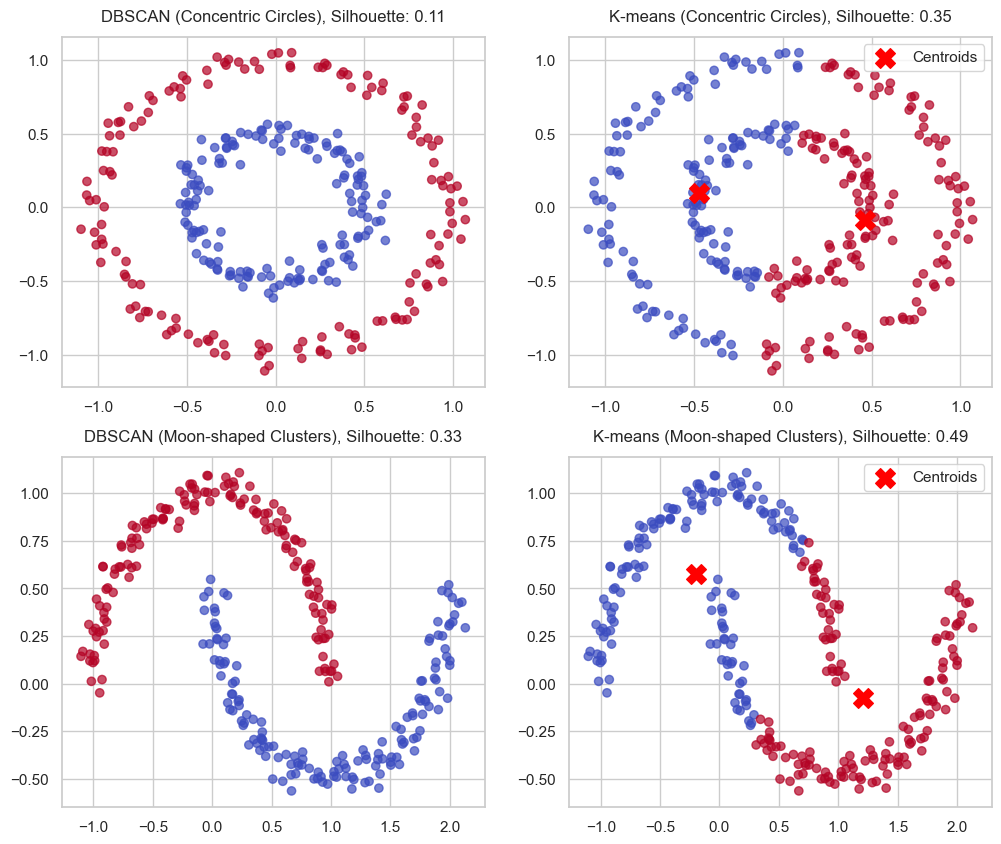

In [11]:
# Apply DBSCAN and K-means
datasets = [X_circles, X_moons]
titles = ['Concentric Circles', 'Moon-shaped Clusters']

fig, ax = plt.subplots(2, 2, figsize=(12, 10)) # 2x2 grid

for i, data in enumerate(datasets):

    # DBSCAN (eps=0.2, min_samples=5) // https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#
    dbscan_clustering = DBSCAN(eps=0.2, min_samples=5)
    dbscan_assignements= dbscan_clustering.fit_predict(data)

    # K-means (k=2, random_state=42) // https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
    kmeans_clusters = kmeans.fit_predict(data)
    kmeans_centroids = kmeans.cluster_centers_ # To plot the two centroids markers as before

    # Rounded silhouette score // https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
    dbscan_silhouette_score = round(silhouette_score(data, dbscan_assignements), 2)
    kmeans_silhouette_score = round(silhouette_score(data, kmeans_clusters), 2)

    # Plot DBSCAN (Hint: ax[i, 0]) // https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter
    ax[i, 0].scatter(data[:, 0], # Plot graph for  concentric circles (top row = 0) and moon-shaped clusters (bottom row = 1) in the grid
                     data[:, 1],
                     c=dbscan_assignements, cmap='coolwarm', alpha=0.7)

    # Plot K-means (Hint: ax[i, 1])
    centroid_kwargs = {'marker': 'X', 's': 200, 'c': 'red', 'label': 'Centroids'}
    ax[i, 1].scatter(data[:, 0],
                     data[:, 1],
                     c=kmeans_clusters, cmap='coolwarm', alpha=0.7)
    ax[i, 1].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], **centroid_kwargs) # Plot the centroids with a marker

    # Titles and legend
    ax[i, 0].set_title(f'DBSCAN ({titles[i]}), Silhouette: {dbscan_silhouette_score}', y=1.02)
    ax[i, 1].set_title(f'K-means ({titles[i]}), Silhouette: {kmeans_silhouette_score}', y=1.02)
    ax[i, 1].legend()

plt.show()


2.7 **(1pt) Does the silhouette score, based on Euclidean distance, accurately reflect the clustering quality for both DBSCAN and K-means in the above datasets, or are there cases where visual inspection (eye-balling) provides a better assessment?**

In one hand, for K-Means (which try to make spherical clusters around centroids) we can clearly see that the silhouette is not very representative of the clustering quality in the case of non-convex shape:
   - like here the circles or moon-shaped patterns of the data.

In the other hand, DBSCAN is not bothered by these non-convex shapes to do assignments. However, DBSCAN silhouette score is affected by the density of the datapoint in the shapes, here lowering it's score in comparison to K-means.

In the end: eye balling (good to find/identify patterns) is usefull e.g.:
- non-convex shape are involved
- if not very distinct density variation are present in the data
- if there is noise and or outliers.

Thus, Eye balling(human interpretation), silhouette and or elbow method are to be used in conjunctions to assess the quality of the different clustering methods


---
# 3. PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the data into a new coordinate system. The new coordinates (principal components) are ordered by the amount of variance they explain.

**Algorithm:**
1. Standardize the data
2. Compute the covariance matrix
3. Calculate eigenvectors and eigenvalues of the covariance matrix
4. Sort eigenvectors by decreasing eigenvalues
5. Choose top k eigenvectors to form a projection matrix
6. Transform the original data using the projection matrix

🤷 Need some help? Check out this [video](https://www.youtube.com/watch?v=HMOI_lkzW08&ab_channel=StatQuestwithJoshStarmer).


#### 3.1 **(3pt) Plot the entire penguins dataset (no split, keep the classes) projected into 2 dimensions using PCA. Use scikit-learn to compute the principal components.**

**Instructions:**
- Don't forget to standardize the data before applying PCA using `StandardScalar()`.
- Try to use `matplotlib` for plotting. It's more challenging than `seaborn` but it's a great skill to have.
- Add labels to the plot, `xlabel` should be 'PC1' and `ylabel` should be 'PC2'.
- Add the explained variance to the x and y labels. You can find them with `pca.explained_variance_ratio_`.
- To color-code a plot according to the labels in `matplotlib` you must pass the parameter `c` an array of numbers. Remember that you can convert string labels by using `df['y'].astype('category').cat.codes`

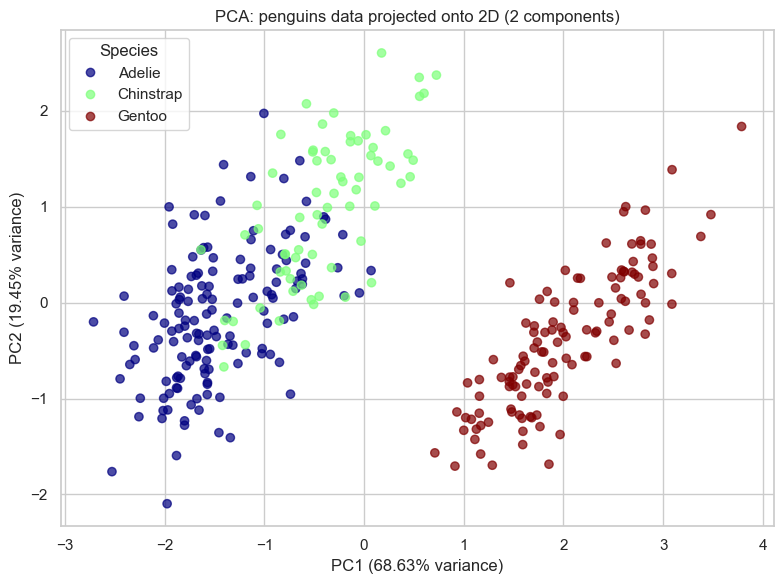

In [12]:
from sklearn.decomposition import PCA

# Load the penguins dataset // Drop missing value rows, categorical columns: keep only numerical features and define labels
df_penguins = sns.load_dataset("penguins").dropna()
X = df_penguins.drop(['species', 'island', 'sex'], axis=1) # If we keep all numerical classes + island and sex (one-hot encoded) except the species (targets) we get different top PCs and graphs, # less variance explained by the two top PC too and missclassification seems to be worse.

species_labels_encoded = df_penguins['species'].astype('category').cat.codes # 0,1,2 for Adelie, Chinstrap, Gentoo classes
species_labels_name = df_penguins['species'].unique().tolist() # list of "Adelie", "Chinstrap", "Gentoo" classes

# Standardize the data // https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_scaled = StandardScaler().fit_transform(X) # Compute and standardize features by removing the mean and scaling to unit variance z = (x - u) / s
                                             # Usefull for data who follow a normal distribution, otherwise use RobustScaler (for data with outlier: median), PowerTransformer(highly skewed data)

# Apply scikit-learn PCA // https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(n_components=2) # Keeps the two top component (maximizing variance retention) for dimension reduction.
X_pca = pca.fit_transform(X_scaled) # Fit the model with X (compute covariance matrix -> eigenvalue/eigenvectors and select the top principal components)
                                    # And apply the dimensionality reduction on X (transform). Xpca = Xscaled * W.
explained_variance = pca.explained_variance_ratio_ # Variance retained % for the two top components

# Plot scikit-learn PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], # Plot the two component PC1,PC2 as the two axis.
                      X_pca[:, 1],
                      c=species_labels_encoded, cmap='jet', alpha=0.7) # Color coding using species classes
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')

plt.title('PCA: penguins data projected onto 2D (2 components)')
plt.legend(handles=scatter.legend_elements()[0], labels=species_labels_name, title='Species')


plt.tight_layout()
plt.show()


#### 3.2 **(5pt) Using the penguins dataset, perform K-means clustering on the scaled data. Print the silhouette score for the K-means clustering. Then, visualize the clustering results in a 2D PCA space by creating two subplots:**

**Instructions:**
- The first subplot should show the K-means clustering labels, with the centroids of the clusters plotted in PCA space.
- Print the silhouette score.
- The second subplot should display the true species labels, with the same centroids plotted in PCA space.
- Make sure to label the axes with the percentage of variance explained by the first two principal components and include the centroids in both subplots.
- Finally, describe the results:
  - Did the K-means algorithm successfully cluster the data?
  - How do the K-means clusters compare with the true species labels (visually and silhouette score)?

❗Remember, the species labels are randomized due to the initialization of $k$-means, so the colors in the $k$-means clustering plot may not correspond directly to the true species labels.

**❓Hint:**

To add legends for the K-means clusters and true species labels, use the `legend_elements()` method from the scatter plot objects. The `legend_elements()` returns a tuple with the handles (plotting objects) and the labels. After plotting the data in both subplots, call `legend_elements()` on the `scatter1` and `scatter2` objects, and then pass the returned legend handles and labels to `ax1.legend()` and handles only to `ax2.legend()` so we can use the string labels.

Ensure you include the centroids in the legends by specifying the appropriate label in the `scatter()` call for the centroids.

```
legend1 = ax1.legend(*scatter1.legend_elements(), title="K-means Clusters") # labels found by KMeans
legend2 = ax2.legend(handles=scatter2.legend_elements()[0], labels=list(labels), title="Species") # True labels
```









c:\Users\olivi\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.45


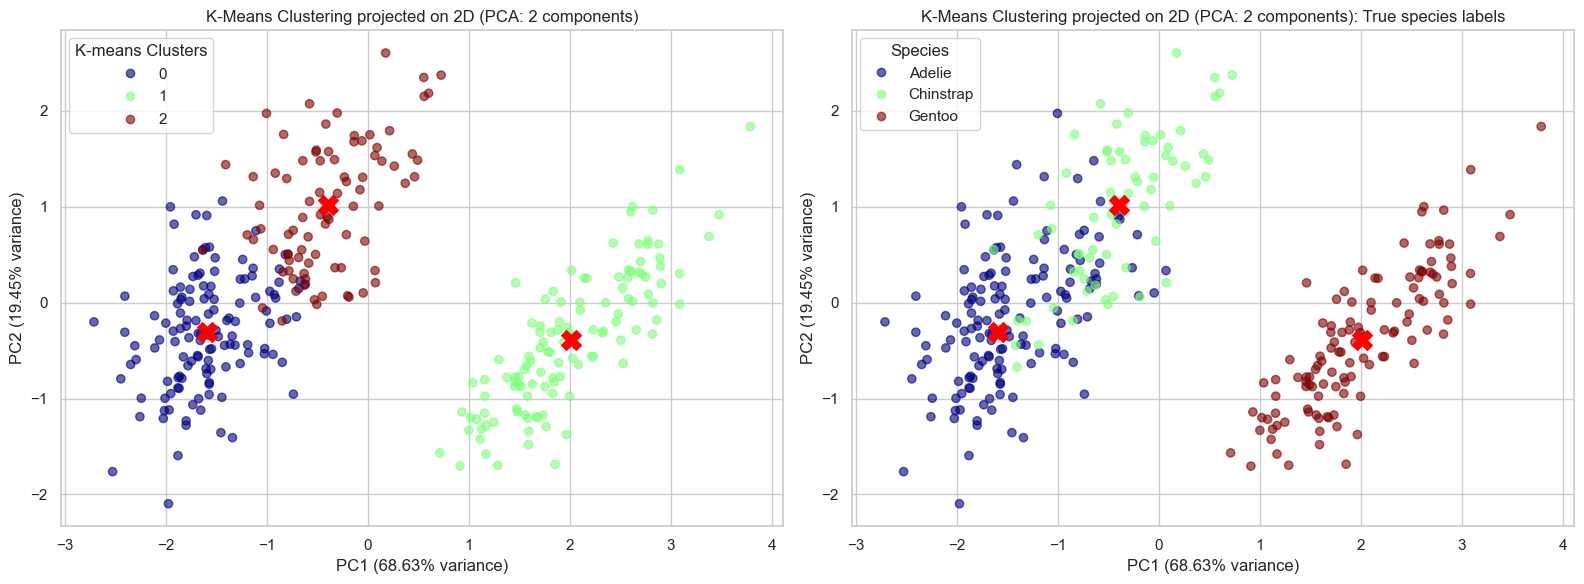

In [13]:
# Run K-means on the SCALED data (not PCA data)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto") # Three species, Three cluster
kmeans_clusters= kmeans.fit_predict(X_scaled)

# Print the Silhouette Score
print(f"Silhouette Score: {round(silhouette_score(X_scaled, kmeans_clusters), 2)}")

# CRITICAL STEP: Transform centroids to PCA space // https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
centroids_pca = pca.transform(kmeans.cluster_centers_) # Coordinates of cluster's centroids expressed in the PCA space

# Plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Species found by KMeans clustering
scatter1 = ax1.scatter(X_pca[:, 0], # Axis PC1,PC2 (PCA space)
                       X_pca[:, 1],
                       c=kmeans.labels_, cmap='jet', alpha=0.6) # Color coding by cluster: clusters labelling don't correspond to true species labels in kmeans (random).
ax1.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)') # Explained variance by each PC
ax1.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')
ax1.set_title('K-Means Clustering projected on 2D (PCA: 2 components)')

# Add centroids to left plot
centroid_kwargs = {'marker': 'X', 's': 200, 'c': 'red', 'label': 'Centroids'} # Styling for centroid marker
ax1.scatter(centroids_pca[:, 0],centroids_pca[:, 1],**centroid_kwargs) # Plot the centroids with a red cross marker

# Right plot: Data colored by true species
scatter2 = ax2.scatter(X_pca[:, 0], # Axis PC1,PC2 (PCA space)
                       X_pca[:, 1],
                       c=species_labels_encoded, cmap='jet', alpha=0.6) # Color coding by True species labels
ax2.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
ax2.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')
ax2.set_title('K-Means Clustering projected on 2D (PCA: 2 components): True species labels')

# Add centroids to right plot
ax2.scatter(centroids_pca[:, 0],centroids_pca[:, 1], **centroid_kwargs)

# Legends
ax1.legend(*scatter1.legend_elements(), title="K-means Clusters") # Labels found by Kmeans
ax2.legend(handles=scatter2.legend_elements()[0], labels=species_labels_name, title="Species") # True labels

plt.tight_layout()
plt.show()


**Did the K-means algorithm successfully cluster the data?**
- Yes, relatively well however there is some missclassifications where there is overlap of Adelie and Chinstraps (FP: Adelie as Chinstrap and Chinstrap as Adelie, blue as green and green as blue).
- This is a default inherent to the spherical/circular shape of clustering around the centroids for k-means.

**How do the K-means clusters compare with the true species labels (visually and silhouette score)** ?
  - A 0.45 silhouette score is not bad, but it indicates that there is probably some overlapping.
  - Visually K-mean distinguish very well Gentoo from the two other, but has difficulties to separates Chinstrap from Adelie (where there is some overlapping of the two classes)

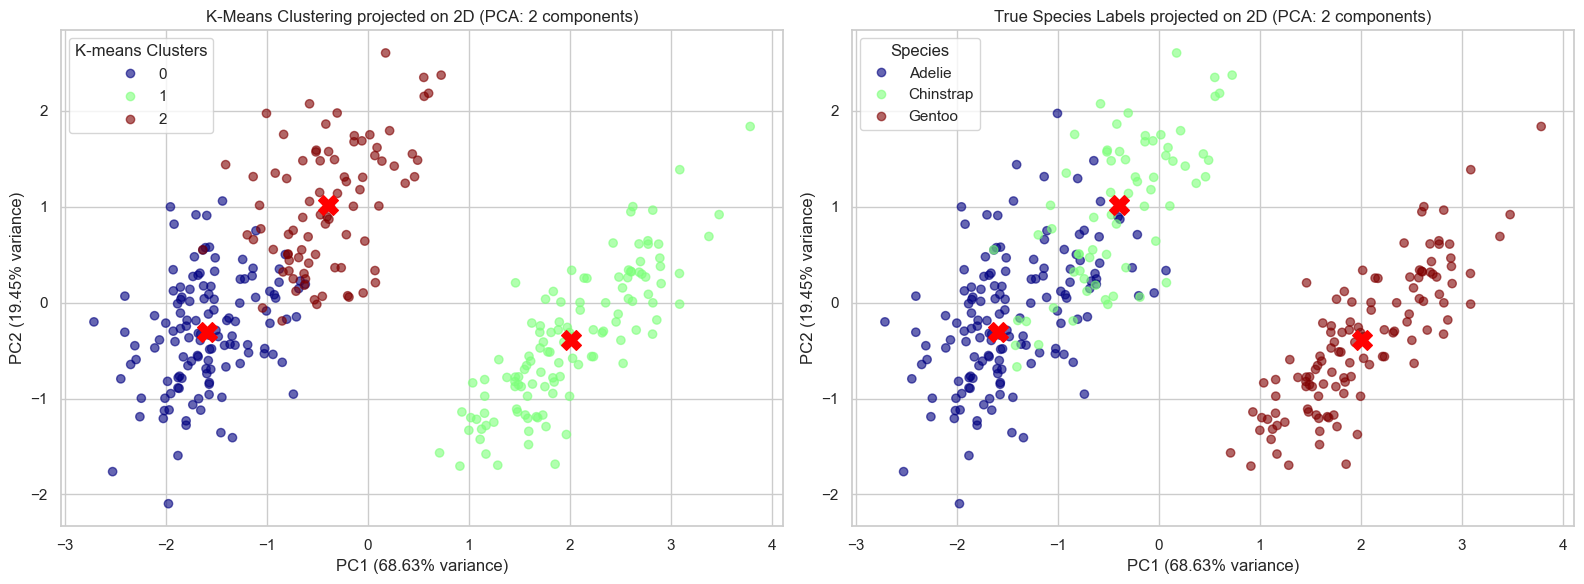

In [14]:
# We could also make a loop for both graph like before // a bit shorter, less redundant
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_info = [(kmeans_clusters, 'K-Means Clustering'), (species_labels_encoded, 'True Species Labels')]
cmap = 'jet'

for i, (labels, title) in enumerate(plot_info):
    ax = axes[i]
    scatter = ax.scatter(X_pca[:, 0],
                         X_pca[:, 1],
                         c=labels, cmap=cmap, alpha=0.6)
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], **centroid_kwargs)
    ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
    ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')
    ax.set_title(f'{title} projected on 2D (PCA: 2 components)')

    if i == 0:
        ax.legend(*scatter.legend_elements(), title="K-means Clusters")
    else:
        ax.legend(handles=scatter.legend_elements()[0], labels=species_labels_name, title="Species")

plt.tight_layout()
plt.show()


In [15]:
points

34

---
# Conclusion and Further Resources  

In this assignment, we explored **Unsupervised Learning**, focusing on **clustering** and **Principal Component Analysis (PCA)**. These techniques help uncover hidden patterns in data without labeled examples. Clustering, such as K-Means, groups similar data points, while PCA reduces dimensionality to simplify analysis and visualization. Though powerful, both methods have limitations—clustering requires careful parameter selection, and PCA can obscure important information.

To deepen your understanding, explore these tutorials:  

1. [**K-Means for Image Segmentation**](https://www.kaggle.com/code/viktorreichert/k-means-tumor-image-segmentation) – Learn how clustering is applied in medical imaging by segmenting a brain tumor.  
2. [**PCA in Practice**](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2015/tutorials/r5_pca.html) – Gain hands-on experience with PCA and understand its pitfalls. The final discussion highlights a crucial lesson—**dimensionality reduction hides information**. Misinterpreting PCA plots can lead to major mistakes, as illustrated by a sarcastic example of searching for "the perfect human." Always remember: every tool has its strengths and weaknesses, and blind reliance on algorithms can be risky.  

Make sure to engage with these resources critically—understanding the consequences of your methods is just as important as learning how to use them!